In [14]:
import cv2
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread("New_Zealand_Coast.jpg", 1)
print(img.shape)

(600, 840, 3)


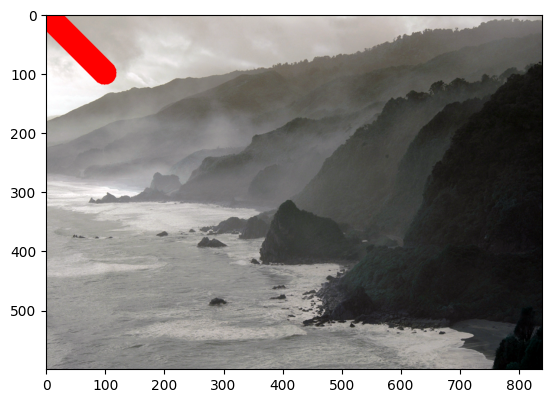

In [17]:
for i in range(10, 100):
    cv2.circle(img, (i, i), 20, (255, 0, 0), -1)
plt.imshow(img)